In [99]:
import math
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

                           Watt
2020-06-01 01:00:00  294.272396
2020-06-01 02:00:00  232.861123
2020-06-01 03:00:00  106.304300
2020-06-01 04:00:00   45.877666
2020-06-01 05:00:00  124.174894


Text(0, 0.5, 'Watt')

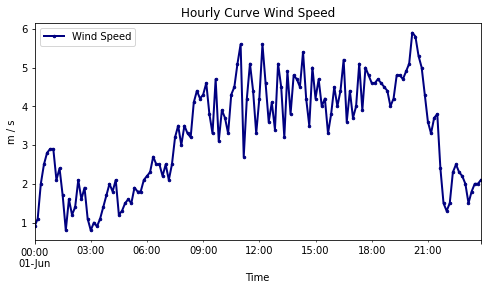

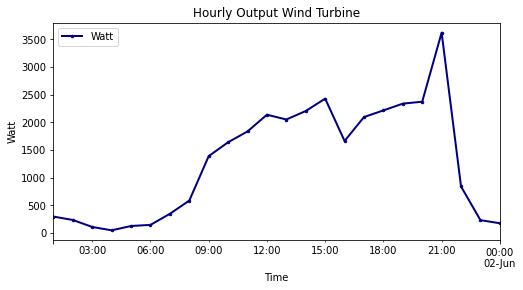

In [100]:
f=open('data/produkt_zehn_min_ff_20200101_20201231_05705.txt',"r")
rows=f.readlines()
result={}

for row in rows:
    key = row.split(';')[1]
    value = row.split(';')[3]

    if key.startswith('20200601'):
        datetime_key = datetime.strptime(key, '%Y%m%d%H%M')
        result[datetime_key] = value
f.close()
df = pd.DataFrame.from_dict(result, orient='index', columns=['Wind Speed'])
df['Wind Speed'] =  pd.to_numeric(df['Wind Speed'])

ax = df.plot(lw=2, colormap='jet', marker='.', markersize=5, title='Hourly Curve Wind Speed', figsize=(8, 4))
ax.set_xlabel("Time")
ax.set_ylabel("m / s")

watt = df
watt['Watt'] =  math.pi / 2 * 5.1**2 * watt['Wind Speed']**3 * 1.2 * 0.5

# Set Bottom
#watt['Wind Speed'].values[watt['Wind Speed'] < 3] = 0
# Set Ceiling
#watt['Watt'].values[watt['Watt'] > 8999] = 9000

del watt['Wind Speed']
hour = watt.resample('H', label='right').mean()
print(hour.head())
ax = hour.plot(lw=2, colormap='jet', marker='.', markersize=5, title='Hourly Output Wind Turbine', figsize=(8, 4))
ax.set_xlabel("Time")
ax.set_ylabel("Watt")
